# ДАННЫЕ АКТУАЛЬНЫ НА 20.09.

Данные на сайте, с которого парсила информацию, являются динамичными. Поэтому при повторном запуске, данные могут измениться.

In [1]:
#ИМПОРТИРУЕМ ВСЕ НЕОБХОДИМЫЕ БИБЛИОТЕКИ И МОДУЛИ

from selenium import webdriver #ДЛЯ АВТОМАТИЗИРОВАННОЙ РАБОТЫ С БРАУЗЕРОМ
from bs4 import BeautifulSoup  #ДЛЯ ПАРСИНГА
import pandas as pd            #ДЛЯ РАБОТЫ С ТАБЛИЦАМИ
from tqdm import tqdm_notebook #ДЛЯ ОТСЛЕЖИВАНИЯ ВЫПОЛНЕНИЯ КОМААНДЫ
import time                    #ДЛЯ УСТАНОВКИ ТАЙМ-АУТОВ
import requests as r           #ДЛЯ ПОЛУЧЕНИЯ ДОСТУПА К ИНФОРМАЦИИ СТРАНИЦЫ
from selenium.webdriver.chrome.options import Options
import scipy.stats as sts      #
import matplotlib.pyplot as plt#Построение графиков
import seaborn as sns          #Построение графивок
from fake_useragent import UserAgent
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#ОТКРЫВАЕМ БРАУЗЕР

driver = webdriver.Chrome()

In [3]:
#ОТКРЫВАЕМ САЙТ

url = 'https://smart-lab.ru/'
driver.get(url)

In [4]:
#КЛИКАЕМ ПО МЕНЮ С НУЖНОЙ ИНФОРМАЦИЕЙ (КОТИРОВКИ)

driver.find_element(by = 'id', value = 'quotes_menu').click()

In [5]:
#ЗАПИСЫВАЕМ HTML КОД В ПЕРЕМЕННУЮ SOUP

soup = BeautifulSoup(driver.page_source)

In [6]:
#СОБИРАЕМ ССЫЛКИ НА СТАТИСТИКУ И ЗАПИСЫВАЕМ В СЛОВАРЬ

names = [i.text for i in soup.find('div', class_="undermenu_more clickmenu").find_all('a')] #наименование статистики
links = [i.get('href') for i in soup.find('div', class_="undermenu_more clickmenu").find_all('a')] #ссылка на статистику

link = {k: v for k, v in zip(names, links)} #генерируем словарь

link

{'Российские акции - Московская Биржа': '/q/shares/',
 'Американские акции - СПб Биржа': '/q/spbex/',
 'Валютный рынок - Московская Биржа': '/q/currencies/',
 'Корпоративные облигации - Московская Биржа': '/q/bonds/',
 'ОФЗ - Московская Биржа': '/q/ofz/',
 'Фьючерсы': '/q/futures/',
 'Фондовые индексы, сырьевые рынки, FOREX': '/q/world-quotes/',
 'Американские акции - Биржи США': '/q/usa/',
 'Мировые акции - Иностранные Биржи': '/q/world-stocks/',
 'Биржевые ПИФы и ETF - Московская Биржа': '/q/etf/',
 'Американские акции - Московская Биржа': '/q/usa-stocks-moex/',
 'ПИФы - Московская Биржа': '/q/pif/',
 'Еврооблигации - Московская Биржа': '/q/eurobonds/',
 'Индексы Российских Акций': '/q/index_stocks/',
 'РЕПО с ЦК': '/q/repo-s-ck/',
 'Индексы РЕПО': '/q/index_repo/',
 'Индексы облигаций': '/q/index_bonds/'}

In [7]:
#ЗАКРЫВАЕМ БРАУЗЕР

driver.close()

# Российские акции

In [8]:
#ПАРСИМ ТАБЛИЦУ С САЙТА С ПОМОЩЬЮ PANDAS READ_HTML

u = link['Российские акции - Московская Биржа']
url = 'https://smart-lab.ru'+u
response = r.get(url, headers = {'User-Agent': UserAgent().random})
df = pd.read_html(response.text)[0]

In [9]:
#ДЕЛАЕМ СРЕЗ ТАБЛИЦЫ, ОСТАВЛЯЯ НУЖНЫЕ ДАННЫЕ И УДАЛЯЕМ ДАННЫЕ, СОДЕРЖАЩИЕ ПУСТЫЕ ЗНАЧЕНИЯ

df_cut = df[['Название', 'Тикер', 'Цена, посл', 'Объем, млн руб', '12м, %']].dropna()

In [10]:
#УДАЛЯЕМ СТРОКИ С РЕКЛАМОЙ

df_cut = df_cut.drop(axis = 0, index = 16).drop(axis = 0, index = 41)

In [11]:
df_cut.head(5)

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
0,Индекс ММВБ,IMOEX,3068.15,90 455.50,+38.5%
1,Сбербанк,SBER,254.72,15 679.61,+103.5%
2,ЛУКОЙЛ,LKOH,6432.5,11 275.09,+60.5%
3,Транснф ап,TRNFP,143750,5 582.74,+50.6%
4,ВТБ ао,VTBR,0.02561,5 437.30,+39.5%


In [12]:
#ТК ЦЕНА, ОБЪЕМ И ИЗМЕНЕНИЕ ЗА ГОД (12М, %) БЫЛИ СТРОКОВЫМИ ЗНАЧЕНИЯМИ, ТО ПЕРЕВОДИМ В ВЕЩЕСТВЕННЫЙ ТИП ДАННЫХ

df_cut['Объем, млн руб'] = df_cut['Объем, млн руб'].str.replace(' ', '').astype(float)
df_cut['Цена, посл'] = df_cut['Цена, посл'].astype(float)
df_cut['12м, %'] = df_cut['12м, %'].str.replace(' ', '').str.replace('%', '').astype(float)

In [13]:
#ВЫЗЫВАЕМ МЕТОД DESCRIBE, КОТОРЫЙ РАСЧИТЫВАЕТ ОСНОВНЫЕ ПОКАЗАТЕЛИ

df_cut.describe()

,"Цена, посл","Объем, млн руб","12м, %"
count,241.000000,241.000000,241.000000
mean,3206.385637,913.289834,165.976763
std,11897.500424,5981.538201,210.109081
min,0.010376,0.490000,-79.100000
25%,13.660000,6.340000,47.800000
50%,172.050000,51.550000,97.800000
75%,1103.000000,481.920000,223.600000
max,143750.000000,90455.500000,2234.600000


ВЫВОД: 
1. средняя стоимость российских акций - 3206 рублей
2. средний объем торгов за день - 913 млн рублей
3. минимальная стоимость акций - 0.01 рубль, максимальная - 143750 рублей
4. минимальный объем торгов - 0.49 млн рублей, максимальный - 90455 млн рублей
5. медиана (50% квантиль) по цене 172 рублей (что почти в 19 раз ниже среднего)
6. медиана по объемам торгов - 51,5 млн рублей (что почти в 18 раз ниже среднего)
7. большое стандартное отклонение говорит о сильном разбросе между значениями

Сильные различия медианы и среднего говорит о наличии достаточно серьезных выбросов (т.е в выборке есть сверх дорогие акции и акции, с которыми было произведено очень много сделок за день). Среднее значение чувствительно к выбросам, а медиана нет.

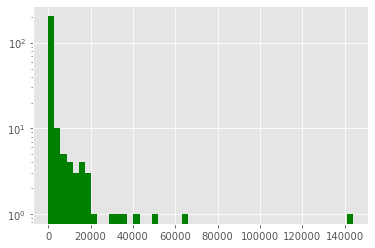

In [14]:
df_cut['Цена, посл'].hist(bins = 50, log = True, color = 'green');

#на гистаграмме видно, что стоимость большиснтва акций лежит в пределах до 20 тысяч, 

In [15]:
df_cut['Цена, посл'].quantile(0.9) #выходит что у 90% акций цена меньше 6432,5 рублей


6432.5

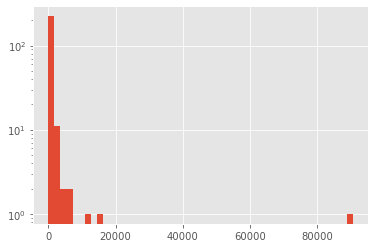

In [16]:
df_cut['Объем, млн руб'].hist(bins = 50, log = True);

#аналогично для объема торгов

In [17]:
df_cut['Объем, млн руб'].quantile(0.9) #выходит что у 90% акций объем торгов меньше 1531,79 млн рублей

1531.79

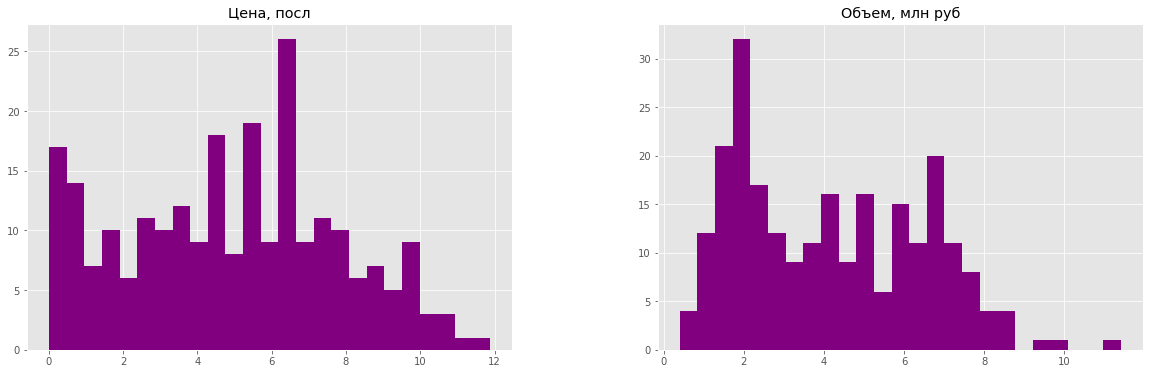

In [18]:
#сглаживаем выбросы
df_cut[['Цена, посл', 'Объем, млн руб']].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6), bins=25, color = 'Purple');

In [19]:
#ВЫВЕДЕМ АКЦИИ, КОТОРЫЕ ВХОДЯТ В 5% НАИБОЛЕЕ ДОРОГИХ

df_cut[df_cut['Цена, посл'] > df_cut['Цена, посл'].quantile(0.95)]


,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
3,Транснф ап,TRNFP,143750.0,5582.74,50.6
107,Акрон,AKRN,18820.0,101.06,11.0
133,ЭнергияРКК,RKKE,31620.0,41.21,421.8
134,ВСМПО-АВСМ,VSMO,49900.0,40.12,-10.7
140,Лензолото,LNZL,17730.0,31.05,94.8
171,КоршГОК ао,KOGK,65200.0,10.28,75.3
177,Приморье,PRMB,40600.0,8.66,14.7
194,ЧКПЗ ао,CHKZ,19100.0,5.91,223.7
202,ПавлАвт ао,PAZA,16720.0,5.07,221.5
223,ВыбСудЗ ао,VSYD,22385.0,3.87,435.5


In [20]:
#ВЫВЕДЕМ АКЦИИ, КОТОРЫЕ ВХОДЯТ В 5% НАИБОЛЕЕ ПОПУЛЯРНЫХ ДЛЯ СДЕЛОК (САМЫЕ ЛИКВИДНЫЕ)

df_cut[df_cut['Объем, млн руб'] > df_cut['Объем, млн руб'].quantile(0.95)]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
0,Индекс ММВБ,IMOEX,3068.15000,90455.50,38.5
1,Сбербанк,SBER,254.72000,15679.61,103.5
2,ЛУКОЙЛ,LKOH,6432.50000,11275.09,60.5
3,Транснф ап,TRNFP,143750.00000,5582.74,50.6
4,ВТБ ао,VTBR,0.02561,5437.30,39.5
5,ГАЗПРОМ ао,GAZP,169.19000,5381.00,-22.5
6,Роснефть,ROSN,531.50000,4569.02,63.1
7,АЛРОСА ао,ALRS,72.90000,3589.09,2.8
8,НЛМК ао,NLMK,200.58000,3451.35,84.9
9,Yandex clA,YNDX,2427.00000,3218.62,21.8


In [21]:
#САМАЯ ДОРОГАЯ АКЦИЯ
df_cut[df_cut['Цена, посл'] == df_cut['Цена, посл'].max()]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
3,Транснф ап,TRNFP,143750.0,5582.74,50.6


In [22]:
#САМАЯ ДЕШЕВАЯ АКЦИЯ
df_cut[df_cut['Цена, посл'] == df_cut['Цена, посл'].min()]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
66,ТГК-1,TGKA,0.010376,441.12,29.3


In [23]:
#АКЦИЯ С НАИБОЛЬШИМ ОБЪЕМОМ ТОРГОВ
df_cut[df_cut['Объем, млн руб'] == df_cut['Объем, млн руб'].max()]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
0,Индекс ММВБ,IMOEX,3068.15,90455.5,38.5


In [24]:
#АКЦИЯ С НАИМЕНЬШИМ ОБЪЕМОМ ТОРГОВ
df_cut[df_cut['Объем, млн руб'] == df_cut['Объем, млн руб'].min()]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
247,ГазпРнД ао,RTGZ,35600.0,0.49,42.4


In [25]:
#АКЦИИ, ПОКАЗАВШИЕ ЛУЧШУЮ ДИНАМИКУ (АКЦИИ - ЛИДЕРЫ ЗА ГОД)

df_cut.sort_values(by = '12м, %', ascending=False)[:10]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
44,ГТМ ао,GTRK,635.00000,834.67,2234.6
175,ТНСэнРст,RTSB,5.47800,8.94,861.1
163,ТНСэнМарЭл,MISB,108.10000,12.19,738.0
114,КрасОкт-ао,KROT,2803.00000,73.58,735.5
148,СаратЭн-ао,SARE,0.85400,21.59,669.4
198,ТНСэМаЭл-п,MISBP,98.00000,5.62,648.1
154,КамчатЭ ао,KCHE,1.19850,17.79,646.7
151,РСетКубань,KUBE,406.30000,18.41,644.1
128,ТГК-14,TGKN,0.01817,49.73,638.6
237,КСБ ао,KTSB,4.48800,1.94,603.4


ЛУЧШУЮ ДИНАМИКУ ЗА ГОД ПОКАЗАЛИ АКЦИИ ГТМ ао - Globaltruck ("ГЛОБАЛТРАК МЕНЕДЖМЕНТ) – один из крупнейших автомобильных грузовых FTL-перевозчиков в России. Компания является лидером на рынках Урала и Сибири, и вторым FTL-перевозчиком на российском рынке по размеру парка. В 2017 году компания Globaltruck успешно провела IPO на Московской бирже.

КрасОкт-ао - МОСКОВСКАЯ КОНДИТЕРСКАЯ ФАБРИКА

РЕГИОНАЛЬНЫЕ ЭНЕРГЕТИЧЕСКИЕ КОМПАНИИ - ТНСэнРст, ТНСэнМарЭл, СаратЭн-ао, КамчатЭ ао, РСетКубань	, ТНСэМаЭл-п, ТГК-14, КСБ ао

In [26]:
#ОТСОРТИРУЕМ АКЦИИ ПО ЛИКВИДНОСТИ (ОБЪЕМУ ТОРГОВ) И ИССЛЕДУЕМ ИХ ДИНАМИКУ ЗА ГОД
sort = df_cut.sort_values(by = 'Объем, млн руб', ascending=False)[:10]

sort.sort_values(by = '12м, %', ascending=False)

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
1,Сбербанк,SBER,254.72000,15679.61,103.5
8,НЛМК ао,NLMK,200.58000,3451.35,84.9
6,Роснефть,ROSN,531.50000,4569.02,63.1
2,ЛУКОЙЛ,LKOH,6432.50000,11275.09,60.5
3,Транснф ап,TRNFP,143750.00000,5582.74,50.6
4,ВТБ ао,VTBR,0.02561,5437.30,39.5
0,Индекс ММВБ,IMOEX,3068.15000,90455.50,38.5
9,Yandex clA,YNDX,2427.00000,3218.62,21.8
7,АЛРОСА ао,ALRS,72.90000,3589.09,2.8
5,ГАЗПРОМ ао,GAZP,169.19000,5381.00,-22.5


СРЕДИ 10 НАИБОЛЕЕ ПОПУЛЯРНЫХ АКЦИЙ НАИЛУЧШУЮ ДИНАМИКУ В ТЕЧЕНИЕ ГОДА ПОКАЗАЛИ АКЦИИ СБЕРБАНКА (РОСТ СОСТАВИЛ 103%), НЛМК ао (+85%), ЛУКОЙЛА (+60), ТРАНСНЕФТИ (+53) И ДРУГИЕ
АКЦИИ ГАЗПРОМА ПОКАЗАЛИ ХУДХУЮ ДИНАМИКУ СРЕДИ НАИБОЛЕЕ ПОПУЛЯРНЫХ АКЦИЙ (ПАДЕНИЕ НА 22,5% ЗА ГОД)

In [27]:
#АКЦИИ, ПОКАЗАВШИЕ ХУДШУЮ ДИНАМИКУ (АУТСАЙДЕРЫ ЗА ГОД)

df_cut.sort_values(by = '12м, %', ascending=True)[:10]

,Название,Тикер,"Цена, посл","Объем, млн руб","12м, %"
21,Русолово,ROLO,1.4074,1704.06,-79.1
147,Русгрэйн,RUGR,14.1450,21.90,-22.6
5,ГАЗПРОМ ао,GAZP,169.1900,5381.00,-22.5
69,Сегежа,SGZH,5.1990,403.94,-18.6
134,ВСМПО-АВСМ,VSMO,49900.0000,40.12,-10.7
149,Лента ао,LENT,723.0000,21.46,-10.1
46,РУСАЛ ао,RUAL,40.9300,799.05,-2.7
91,М.видео,MVID,192.1000,162.86,-1.7
50,ФосАгро ао,PHOR,6936.0000,728.52,-1.6
162,Росбанк ао,ROSB,101.2000,12.38,-0.6


СТОИТ ОТМЕТИТЬ, ЧТО АКЦИИ РУСОЛОВО ЗА ГОД ПОКАЗАЛИ ПОЛОЖИТЕЛЬНУЮ ДИНАМИКУ, ОДНАКО В ТАБЛИЦЕ ФИКСИРУЕТСЯ ИЗМЕНЕНИЕ НА -79%. ПОИСХОДИТ ЭТО ПО ПРИЧИНЕ ТОГО, ЧТО В ЯНВАРЕ 2023 ГОДА КОМПАНИЯ ПОВЕЛА СПЛИТ СТОИМОСТИ АКЦИЙ, ТЕ СНИЗИЛА ЕЕ СТОИМОСТЬ В 10 РАЗ.
ПО НЕКОТОРЫМ ДАННЫМ ЦЕНА ЗА ГОД ВЫРОСЛА НА 104%

АКЦИИ ГАЗПРОМА ЗА ГОД ПОКАЗАЛИ ОТРИЦАТЕЛЬНУЮ ДИНАМИКУ (ПАДЕНИЕ СТОИМОСТИ НА 22,6 %). СВЯЗАНО С САНКЦИЯМИ, РЕШЕНИЕМ НЕ ВЫПЛАЧИВАТЬ ДИВИДЕНТЫ И ТД.

# Валютный рынок - Московская Биржа

In [28]:
#ПАРСИМ ДАННЫЕ С САЙТА ПО ВАЛЮТНОМУ РЫНКУ

u = link['Валютный рынок - Московская Биржа']
url = 'https://smart-lab.ru'+u
response = r.get(url, headers = {'User-Agent': UserAgent().random})
df = pd.read_html(response.text)[0]

In [29]:
df_val = df[['Инструм.', 'Цена', 'Объем, млн $']][:24]
df_val.head()

,Инструм.,Цена,"Объем, млн $"
0,CNYRUB_TOM,13.161,1 690.1
1,USDRUB_TOM,96.15,1 274.9
2,USDCNY_TOM,7.3069,564.3
3,EURRUB_TOM,103.025,496.4
4,CNYRUB_TOD,13.181,398.4


In [30]:
#ТК ЦЕНА И ОБЪЕМ БЫЛИ СТРОКОВЫМИ ЗНАЧЕНИЯМИ, ТО ПЕРЕВОДИМ В ВЕЩЕСТВЕННЫЙ ТИП ДАННЫХ

df_val['Объем, млн $'] = df_val['Объем, млн $'].str.replace(' ', '').astype(float)
df_val['Цена'] = df_val['Цена'].astype(float)
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Инструм.      24 non-null     object 
 1   Цена          24 non-null     float64
 2   Объем, млн $  24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [31]:
#САМЫЙ ДОРОГОЙ ИНСТРУМЕНТ --- ЗОЛОТО
df_val[df_val['Цена'] == df_val['Цена'].max()]

,Инструм.,Цена,"Объем, млн $"
11,GLDRUB_TOM,5979.02,4.0


In [32]:
#САМЫЙ ДЕШЕВЫЙ КУРС --- ЕВРО К ДОЛЛАРУ
df_val[df_val['Цена'] == df_val['Цена'].min()]

,Инструм.,Цена,"Объем, млн $"
15,EURUSD_TOD,1.0695,0.5


In [33]:
#В 5% САМЫХ ПОПУЛЯРНЫХ ВАЛЮТ ВХОДЯТ ЮАНЬ (ЧТО НЕ УДИВИТЕЛЬНО, ТК В СВЯЗИ С САНКЦИЯМИ КИТАЙ СТАЛ ОСНОВНЫМ ТОРГОВЫМ ПАРТНЕРОМ) И ДОЛЛАР
df_val[df_val['Объем, млн $'] > df_val['Объем, млн $'].quantile(0.95)]

,Инструм.,Цена,"Объем, млн $"
0,CNYRUB_TOM,13.161,1690.1
1,USDRUB_TOM,96.150,1274.9


In [34]:
#ДОЛЯ ТОРГОВ, КОТОРАЯ ПРИХОДИТСЯ НА РАЗНЫЕ ВАЛЮТЫ

df_val['Доля в объеме'] = df_val['Объем, млн $']/df_val['Объем, млн $'].sum()
df_val.head()

,Инструм.,Цена,"Объем, млн $",Доля в объеме
0,CNYRUB_TOM,13.1610,1690.1,0.327310
1,USDRUB_TOM,96.1500,1274.9,0.246901
2,USDCNY_TOM,7.3069,564.3,0.109284
3,EURRUB_TOM,103.0250,496.4,0.096134
4,CNYRUB_TOD,13.1810,398.4,0.077155


In [35]:
#НА ЮАНЬ-РУБЛЬ, ДОЛЛАР-РУБЛЬ И ДОЛЛАР-ЮАНЬ В СУММЕ ПРИХОДИТСЯ ОКОЛО 70% ОТ ВСЕГО ОБЪЕМА ТОРГОВ ЗА ДЕНЬ

# ОФЗ - Московская Биржа

In [36]:
#ПАРСИМ С САЙТА ДАННЫЕ ПО ОФЗ 

u = link['ОФЗ - Московская Биржа']
url = 'https://smart-lab.ru'+u
response = r.get(url, headers = {'User-Agent': UserAgent().random})
df = pd.read_html(response.text)[0]

In [37]:
#ОСТАВЛЯЕМ НУЖНЫЕ ДАННЫЕ

df_ofz = df[['Имя', 'Лет допогаш.', 'Доходн', 'Цена', 'Объем,млн руб']][:53]
df_ofz.head()

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
0,ОФЗ 25084,0.0,10.9%,99.81,1 306.1
1,ОФЗ 26223,0.4,12.1%,97.81,1 254.5
2,ОФЗ 26242,6.0,11.9%,89.17,1 237.3
3,ОФЗ 29014,2.5,0.0%,99.66,1 116.3
4,ОФЗ 26241,9.2,11.9%,88.68,489.1


In [38]:
#ПЕРЕВОДИМ ДАННЫЕ В ЧИСЛОВОЙ ТИП

df_ofz['Цена'] = df_ofz['Цена'].astype(float)
df_ofz['Лет допогаш.'] = df_ofz['Лет допогаш.'].astype(float)
df_ofz['Доходн'] = df_ofz['Доходн'].str.replace('%', '').astype(float)
df_ofz['Объем,млн руб'] = df_ofz['Объем,млн руб'].str.replace(' ', '').astype(float)

In [39]:
#СОЗДАЕМ ТАБЛИЦУ С ОФЗ, ДОХОДНОСТЬ КОТОРЫХ БОЛЕЕ 10%

df_ofz_max = df_ofz[df_ofz['Доходн'] >= 10]
df_ofz_max.head()

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
0,ОФЗ 25084,0.0,10.9,99.81,1306.1
1,ОФЗ 26223,0.4,12.1,97.81,1254.5
2,ОФЗ 26242,6.0,11.9,89.17,1237.3
4,ОФЗ 26241,9.2,11.9,88.68,489.1
5,ОФЗ 26226,3.1,12.0,90.65,461.5


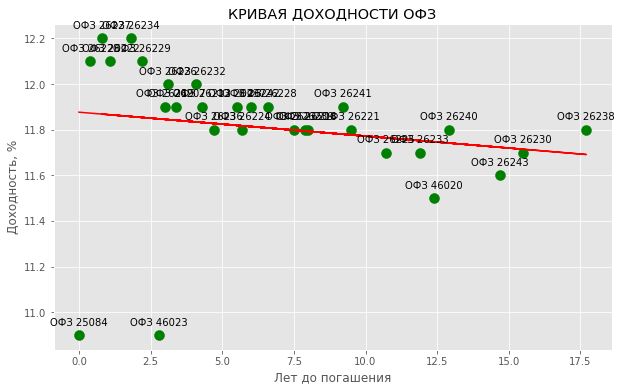

In [40]:
#ПОСТРОИМ ТОЧЕЧНЫЙ ГРАФИК ЛЕТ ДО ПОГАШЕНИЯ - ДОХОДНОСТЬ

plt.figure(figsize=(10, 6)) #РАЗМЕР КАРТИНКИ
plt.scatter(x = df_ofz_max['Лет допогаш.'], y = df_ofz_max['Доходн'], marker='o', s=100, color = 'green')

#ПОДПИСЫВАЕМ ОСИ
plt.xlabel('Лет до погашения')
plt.ylabel('Доходность, %')
plt.title('КРИВАЯ ДОХОДНОСТИ ОФЗ')

#ПОДПИСЫВАЕМ ТОЧКИ
for i, row in df_ofz_max.iterrows():
    plt.annotate(row['Имя'], (row['Лет допогаш.'], row['Доходн']),
                 textcoords='offset points', xytext=(0, 10), ha='center')

#СТРОИМ ЛИНИЮ ТРЕНДА
x = df_ofz_max['Лет допогаш.']
y = df_ofz_max['Доходн']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

plt.plot(x, slope * x + intercept, color='red', linestyle='-', label='Линия тренда')


plt.show()

ВЫВОД:
Построенная линия тренда является кривой доходности ОФЗ. При анализе инвесторы обращают важное внимание на этот инструмент, тк уровень доходности по ОФЗ считается эталонным и он задает тон для других финансовых инструментов. Уровень доходности ОФЗ выступает индикатором настроений на рынке, общей экономической ситуации.

Нормальная кривая, соответствующая благоприятной ситуации в экономике — умеренной инфляции, росту ВВП, росту спроса, имеет положительный наклон. 
В данном случае кривая является почти плоской. Об этом также говорила Набиулина на пресконференции 15 сентября по поводу повышения ключевой ставки до 13%. Плоский вид кривой говорит о жесткой монетарной политике и негативных настроениях в экономике.

In [41]:
df_ofz.describe()

,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
count,53.000000,53.000000,53.000000,53.000000
mean,6.545283,6.681132,95.870189,159.266038
std,4.166790,9.827396,41.737825,329.269778
min,0.000000,-53.400000,66.100000,0.000000
25%,3.300000,0.000000,82.530000,2.500000
50%,6.000000,11.500000,93.790000,20.400000
75%,9.200000,11.900000,98.230000,131.800000
max,17.700000,12.200000,384.990000,1306.100000


ПО ДОХОДНОСТИ МЕДИАНА (11,5) БОЛЬШЕ СРЕДНЕГО (6,68). ПРОИСХОДИТ ИЗ-ЗА ОБЛИГАЦИИ С СИЛЬНОЙ ОТРИЦАТЕЛЬНОЙ ДОХОДНОСТЬЮ

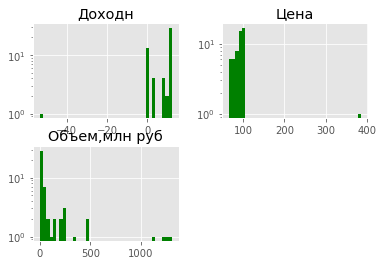

In [42]:
df_ofz[['Доходн', 'Цена', 'Объем,млн руб']].hist(bins = 40, log = True, color = 'green');

НА ГАСТОГРАММАХ ВИДНЫ ВЫБРОСЫ

In [43]:
#ВЫБРОС ПО ДОХОДНОСТИ - ОБЛИГАЦИЯ С НАИМЕНЬШЕЙ ОТРИЦАТЕЛЬНОЙ ДОХОДНОСТЬЮ

df_ofz[df_ofz['Доходн'] == df_ofz['Доходн'].min()]

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
52,ОФЗ 46011,1.9,-53.4,384.99,0.0


In [44]:
#ВЫБРОС ПО ЦЕНЕ - ОБЛИГАЦИЯ С НАИБОЛЬШЕЙ ЦЕНОЙ
df_ofz[df_ofz['Цена'] == df_ofz['Цена'].max()]

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
52,ОФЗ 46011,1.9,-53.4,384.99,0.0


In [45]:
#ВЫБРОС ПО ОБЪЕМАМ ТОРГОВ - ОБЛИГАЦИЯ С НАИБОЛЬШИМ ОБЪЕМОМ ТОРГОВ
df_ofz[df_ofz['Объем,млн руб'] == df_ofz['Объем,млн руб'].max()]

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
0,ОФЗ 25084,0.0,10.9,99.81,1306.1


In [46]:
# ПОПУЛЯРНЫЕ ОФЗ, ВХОДЯЩИЕ В 10% ОФЗ ПО ОБЪЕМАМ ТОРГОВ
df_ofz[df_ofz['Объем,млн руб'] > df_ofz['Объем,млн руб'].quantile(0.9)]

,Имя,Лет допогаш.,Доходн,Цена,"Объем,млн руб"
0,ОФЗ 25084,0.0,10.9,99.81,1306.1
1,ОФЗ 26223,0.4,12.1,97.81,1254.5
2,ОФЗ 26242,6.0,11.9,89.17,1237.3
3,ОФЗ 29014,2.5,0.0,99.66,1116.3
4,ОФЗ 26241,9.2,11.9,88.68,489.1
5,ОФЗ 26226,3.1,12.0,90.65,461.5


СТОИТ ОТМЕТИТЬ, ЧТО СПРОСОМ СЕЙЧАС ПОЛЬЗУЮТСЯ КРАТКОСРОЧНЫЕ ОБЛИГАЦИИ. ЭТО МОЖЕТ ГОВОРИТЬ О ТОМ, ЧТО ИНВЕСТОРЫ СЕЙЧАС НАСТРОЕНЫ НА КРАТКОСРОЧНЫЙ ПЕРИОД ИЗ-ЗА ВЫСОКОЙ ДОЛИ НЕОПРЕДЕЛЕННОСТИ И ОБЩЕЙ СИТУАЦИИ В ЭКОНОМИКЕ.

# Американские акции - СПб Биржа

In [47]:
#ПАРСИМ 100 НАИБОЛЕЕ ПОПУЛЯРНЫХ АМЕРИКАНСКИХ АКЦИЙ НА СПБ

u = link['Американские акции - СПб Биржа']
url = 'https://smart-lab.ru'+u
response = r.get(url, headers = {'User-Agent': UserAgent().random})
df = pd.read_html(response.text)[0]

In [48]:
#УДАЛЯЕМ ПУСТЫЕ ЗНАЧЕНИЯ И ОСТАВЛЯЕТ НУЖНЫЕ КОЛОНКИ

df_spb = df[['Название', 'Тикер', 'Цена посл, $', 'Объем, $', '12м, %']].dropna()
df_spb.head()

,Название,Тикер,"Цена посл, $","Объем, $","12м, %"
0,Tesla,TSLA,272.12,28 142 275,-11.8%
1,NVIDIA,NVDA,431.32,3 096 743,+227.7%
2,Zoom,ZM,69.96,1 073 909,-9.3%
3,AMD,AMD,102.26,996 153,+35.9%
4,Zynerba Pharmaceuticals,ZYNE,1.32,782 504,+30.7%


In [49]:
#УДАЛЯЕМ СТРОКИ С РЕКЛАМОЙ

df_spb = df_spb.drop(axis = 0, index = 16).drop(axis = 0, index = 41)

In [50]:
#ТК ЦЕНА, ОБЪЕМ И ГОДОВОЕ ИЗМЕНЕНИЕ БЫЛИ СТРОКОВЫМИ ЗНАЧЕНИЯМИ, ТО ПЕРЕВОДИМ В ВЕЩЕСТВЕННЫЙ ТИП ДАННЫХ

df_spb['Объем, $'] = df_spb['Объем, $'].str.replace(' ', '').astype(float)
df_spb['Цена посл, $'] = df_spb['Цена посл, $'].astype(float)
df_spb['12м, %'] = df_spb['12м, %'].str.replace('%', '').astype(float)

In [51]:
df_spb.describe()

,"Цена посл, $","Объем, $","12м, %"
count,98.000000,9.800000e+01,98.000000
mean,98.159286,4.798090e+05,6.011224
std,128.973268,2.845449e+06,47.833689
min,0.210000,3.980200e+04,-92.800000
25%,15.125000,5.456900e+04,-20.975000
50%,53.730000,8.596500e+04,5.400000
75%,133.992500,1.786148e+05,30.325000
max,845.490000,2.814228e+07,227.700000


ВЫВОДЫ:
1. МЕДИАНА (КВАНТИЛЬ 50%) СИЛЬНО ОТЛИЧАЕТСЯ ОТ СРЕДНЕГО ПО КАЖДОМУ ПОКАЗАТЕЛЮ ИЗ-ЗА ВЫБРОСОВ (О ЧЕМ БУДЕТ СКАЗАНО ДАЛЕЕ)
2. В СРЕДНЕМ АКЦИИ ЗА ГОД ПОКАЗАЛИ ПОЛОЖИТЕЛЬНУЮ ДИНАМИКУ (СТОИМОСТЬ ВЫРОСЛА В СРЕДНЕМ НА 6%). ОДНАКО ЕСТЬ АКЦИИ, КОТОРЫЕ СИЛЬНО ПРОСЕЛИ (ПАДЕНИЕ НА 93%), И АКЦИИ, КОТОРЫЕ СИЛЬНО ВЫРОСЛИ (РОСТ НА 228%)

In [52]:
#АКЦИИ, ВХОДЯЩИЕ В СОСТАВ 5% НАИБОЛЕЕ ДОРОГИХ СРЕДИ ВЫБОРКИ
df_spb[df_spb['Цена посл, $'] > df_spb['Цена посл, $'].quantile(0.95)]

,Название,Тикер,"Цена посл, $","Объем, $","12м, %"
1,NVIDIA,NVDA,431.32,3096743.0,227.7
21,UnitedHealth Group,UNH,493.83,228339.0,-5.5
40,Netflix,NFLX,392.58,112087.0,61.7
42,MicroStrategy,MSTR,343.19,103706.0,75.3
82,Broadcom,AVGO,845.49,52495.0,71.6


In [53]:
#АКЦИИ, ПОКАЗАВШИЕ ЛУЧШУЮ ДИНАМИКУ (АКЦИИ - ЛИДЕРЫ ЗА ГОД)

df_spb.sort_values(by = '12м, %', ascending=False)[:10]

,Название,Тикер,"Цена посл, $","Объем, $","12м, %"
1,NVIDIA,NVDA,431.32,3096743.0,227.7
25,Applied Therapeutics,APLT,2.76,185178.0,150.9
88,Fastly,FSLY,19.89,46661.0,121.5
22,PBF Energy,PBF,53.92,215401.0,81.4
42,MicroStrategy,MSTR,343.19,103706.0,75.3
82,Broadcom,AVGO,845.49,52495.0,71.6
40,Netflix,NFLX,392.58,112087.0,61.7
27,Freedom Holding,FRHC,87.89,166512.0,61.1
51,Applied Materials,AMAT,138.99,86477.0,57.9
54,Schlumberger,SLB,60.40,80578.0,56.9


ЛИДЕРЫ РОСТА - КОМПАНИИ ЗАНЯТЫЕ С ОСНОВНОМ В СФЕРЕ ПРОИСЗОДСТА ТЕХНИКИ И НОВЫХ ТЕХНОЛОГИЙ, В СФЕРЕ МЕДИЦИНЫ, РАЗВЛЕЧЕНИЙ И ДРУГИЕ.

In [54]:
#АКЦИИ, ПОКАЗАВШИЕ ХУДШУЮ ДИНАМИКУ (АУТСАЙДЕРЫ ЗА ГОД)

df_spb.sort_values(by = '12м, %', ascending=True)[:10]

,Название,Тикер,"Цена посл, $","Объем, $","12м, %"
43,FibroGen,FGEN,0.89,102128.0,-92.8
13,G1 Therapeutics,GTHX,1.38,393709.0,-90.3
100,Applied Molecular Transport,AMTI,0.21,40616.0,-82.1
28,Invitae Corporation,NVTA,0.76,159285.0,-74.1
91,Big Lots,BIG,5.35,45279.0,-71.5
14,Virgin Galactic,SPCE,1.98,387819.0,-61.2
96,DISH Network,DISH,6.53,42627.0,-59.6
15,Enphase Energy,ENPH,126.26,387016.0,-58.6
35,FTC Solar,FTCI,1.50,123800.0,-58.0
29,Dollar General,DG,116.09,156896.0,-52.7


ОДНОЙ ИЗ ЛИДЕРОВ ПАДЕНИЯ СТАЛА КОМПАНИЯ G1 Therapeutics -  биофармацевтическая компания, ведущая клинические испытания. Компания занимается разработкой низкомолекулярных препаратов для лечения рака.

"В феврале 2023 года компания опубликовала данные 3-ей фазы Cosela при CRC. Препарат снизил последствия химиотерапии, но на увеличение продолжительности жизни не повлиял, поэтому G1 свернула испытания. Компания лишилась рынка в 150 тыс. пациентов в год (в 5 раз больше текущего), новости утянули акции с 8 на 3 доллара."

In [55]:
#АКЦИИ, ВХОДЯЩИЕ В СОСТАВ 5% НАИБОЛЕЕ ПОПУЛЯРНЫХ (ЛИКВИДНЫХ) АКЦИЙ СРЕДИ ВЫБОРКИ
df_spb[df_spb['Объем, $'] > df_spb['Объем, $'].quantile(0.95)]

,Название,Тикер,"Цена посл, $","Объем, $","12м, %"
0,Tesla,TSLA,272.12,28142275.0,-11.8
1,NVIDIA,NVDA,431.32,3096743.0,227.7
2,Zoom,ZM,69.96,1073909.0,-9.3
3,AMD,AMD,102.26,996153.0,35.9
4,Zynerba Pharmaceuticals,ZYNE,1.32,782504.0,30.7


In [56]:
#РАСЧИТАЕМ ДОЛИ АКЦИЙ В ОБЪЕМЕ ТОРГОВ ЗА ДЕНЬ

df_spb['Доля в объеме'] = df_spb['Объем, $']/df_spb['Объем, $'].sum()
df_spb.head()

,Название,Тикер,"Цена посл, $","Объем, $","12м, %",Доля в объеме
0,Tesla,TSLA,272.12,28142275.0,-11.8,0.598501
1,NVIDIA,NVDA,431.32,3096743.0,227.7,0.065858
2,Zoom,ZM,69.96,1073909.0,-9.3,0.022839
3,AMD,AMD,102.26,996153.0,35.9,0.021185
4,Zynerba Pharmaceuticals,ZYNE,1.32,782504.0,30.7,0.016641


In [57]:
#НА TESLA, NVIDIA, AMD, Zoom, Zynerba Pharmaceuticals ПРИХОДИТСЯ ОКОЛО 70% ОТ ОБЩЕГО ОБЪЕМА ТОРГОВ ЗА ДЕНЬ

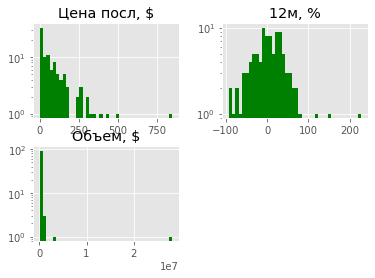

In [58]:
df_spb[['Цена посл, $', '12м, %', 'Объем, $']].hist(bins = 40, log = True, color = 'green');

In [59]:
#ПО КАЖДОМУ ПОКАЗАТЕЛЮ НАБЛЮДАЮТСЯ АНОМАЛИИ (ВЫБРОСЫ)
#НАПРИМЕР, МАКСИМАЛЬНАЯ ЦЕНА АКЦИИ БОЛЬШЕ СРЕДНЕЙ ЦЕНЫ  НА 747 $
df_spb['Цена посл, $'].max() - df_spb['Цена посл, $'].mean()

747.3307142857142

In [60]:
#НАПРИМЕР, МАКСИМАЛЬНЫЙ ОБЪЕМ ТОРГОВ БОЛЬШЕ СРЕДНЕГО НА 27662465.96 $
df_spb['Объем, $'].max() - df_spb['Объем, $'].mean()

27662465.969387755

In [61]:
#НАПРИМЕР, МАКСИМАЛЬНОЕ ИЗМЕНЕНИЕ ЗА ДЕНЬ БОЛЬШЕ СРЕДНЕГО НА 221,69%
df_spb['12м, %'].max() - df_spb['12м, %'].mean()

221.68877551020407

# Фьючерсы

In [62]:
u = link['Фьючерсы']
url = 'https://smart-lab.ru'+u
response = r.get(url, headers = {'User-Agent': UserAgent().random})
df = pd.read_html(response.text)[0]


In [63]:
df_fut = df[['Инструм.', 'Тикер', 'Цена', 'Объем, контр', 'Объем, млн руб', 'Дней доэкспир.', 'ОИ', 'Изм. ОИ', 'Кэрри,%', 'Кэрри,% год.']][:459].dropna()[:100]

In [64]:
df_fut['Объем, контр'] = df_fut['Объем, контр'].str.replace(' ', '').astype(float)
df_fut['Объем, млн руб'] = df_fut['Объем, млн руб'].str.replace(' ', '').astype(float)
df_fut['ОИ'] = df_fut['ОИ'].str.replace(' ', '').astype(float)
df_fut['Изм. ОИ'] = df_fut['Изм. ОИ'].str.replace(' ', '').astype(float)
df_fut['Цена'] = df_fut['Цена'].astype(float)
df_fut['Кэрри,%'] = df_fut['Кэрри,%'].str.replace('%', '').astype(float)
df_fut['Кэрри,% год.'] = df_fut['Кэрри,% год.'].str.replace('%', '').astype(float)
df_fut['Дней доэкспир.'] = df_fut['Дней доэкспир.'].astype(float)

In [65]:
df_fut.describe()

,Цена,"Объем, контр","Объем, млн руб",Дней доэкспир.,ОИ,Изм. ОИ,"Кэрри,%","Кэрри,% год."
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,48686.477691,5448.750000,189.111000,77.270000,2.748147e+05,-1886.580000,1.443500,10.993900
std,63222.976228,21531.568001,597.413597,90.393847,1.122405e+06,13773.323645,2.320669,64.052571
min,1.058000,1.000000,0.200000,1.000000,4.000000e+01,-130632.000000,-3.120000,-161.870000
25%,7046.500000,47.500000,1.200000,2.000000,3.167500e+03,-141.000000,-0.025000,-1.787500
50%,24643.500000,212.000000,4.800000,92.500000,1.040700e+04,-2.000000,0.630000,9.550000
75%,65804.750000,1618.750000,33.050000,93.000000,5.061900e+04,47.500000,3.400000,16.070000
max,311825.000000,175738.000000,3802.400000,456.000000,9.158204e+06,15320.000000,10.160000,224.610000


В ЦЕЛОМ ПО РЫНКУ ФЬЮЧЕРСОВ НАБЛЮДАЕТСЯ В СРЕДНЕМ ПОЛОЖИТЕЛЬНЫЙ КЭРРИ (ЗА ДЕНЬ 1.44%, ЗА ГОД 11%). 
РАЗРЫВ В МЕДИАНЕ И СРЕДНЕМ ГОВОРИТ О НАЛИЧИИ ВЫБРОСОВ В ВИДЕ ОЧЕНЬ БОЛЬШОЙ СТОИМОСТИ ФЬЮЧЕРСА ИЛИ БОЛЬШОМ ОБЪЕМЕ ТОРГОВ.
РАЗБРОС МЕЖДУ ЗНАЧЕНИЯМИ ПОДТВЕРЖДАЕТ И СТАНДАРТНОЕ ОТКЛОНЕНИЕ. 

In [66]:
df_fut.sort_values(by = 'Объем, контр', ascending=False)[:10]

,Инструм.,Тикер,Цена,"Объем, контр","Объем, млн руб",Дней доэкспир.,ОИ,Изм. ОИ,"Кэрри,%","Кэрри,% год."
5,CNY-12.23,CRZ3,13.4670,175738.0,2366.5,92.0,9158204.0,15320.0,2.17,8.49
7,CNY-9.23,CRU3,13.1660,111958.0,1473.7,1.0,4102450.0,-130632.0,-0.11,-40.97
0,Si-9.23,SiU3,96369.0000,39493.0,3802.4,1.0,1463918.0,-23244.0,-0.02,-8.78
3,Si-12.23,SiZ3,94669.0000,35701.0,3377.1,92.0,4885994.0,7530.0,-1.79,-7.00
11,SBRF-9.23,SRU3,25393.0000,29294.0,744.2,2.0,443712.0,-27200.0,-0.31,-55.83
32,VTBR-9.23,VBU3,2573.0000,27737.0,71.1,2.0,357086.0,-17616.0,0.47,84.34
35,VTBR-12.23,VBZ3,2674.0000,19098.0,50.9,93.0,466902.0,-1678.0,4.41,17.08
20,SBRF-12.23,SRZ3,26388.0000,11989.0,316.5,93.0,337020.0,5166.0,3.60,13.92
8,ED-12.23,EDZ3,1.0599,10864.0,1110.7,92.0,1427536.0,3472.0,-0.90,-3.51
31,ALRS-9.23,ALU3,7230.0000,10106.0,73.0,2.0,41462.0,-6224.0,-0.82,-148.15


НАИБОЛЕЕ ПОПУЛЯРНЫМИ ФЬЮЧЕРСАМИ НА ДАННЫЙ МОМЕНТ ЯВЛЯЮТСЯ ФЬЮЧЕРСЫ НА КУРС ЮАНЬ-РУБЛЬ, ЕВРО-РУБЛЬ, ДОЛЛАР-РУБЛЬ, А ТАКЖЕ НА СТОИМОСТЬ АКЦИЙ ВТБ И СБЕРА

In [67]:
df_fut_plt = df_fut[['Инструм.', 'Дней доэкспир.', 'Кэрри,%']]

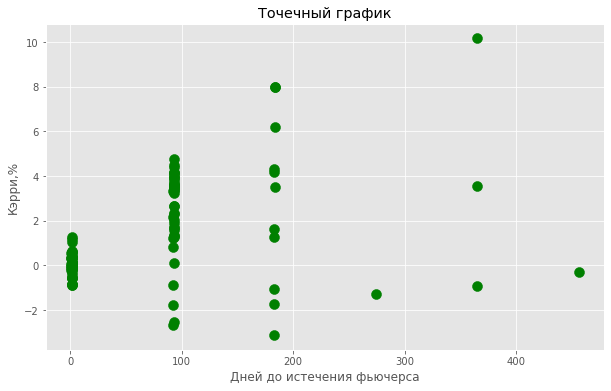

In [68]:
#ПОСТРОИМ ТОЧЕЧНЫЙ ГРАФИК ЛЕТ ДО ПОГАШЕНИЯ - ДОХОДНОСТЬ

plt.figure(figsize=(10, 6)) #РАЗМЕР КАРТИНКИ
plt.scatter(x = df_fut_plt['Дней доэкспир.'], y = df_fut_plt['Кэрри,%'], marker='o', s=100, color = 'green')

#ПОДПИСЫВАЕМ ОСИ
plt.xlabel('Дней до истечения фьючерса')
plt.ylabel('Кэрри,%')
plt.title('Точечный график')
    
plt.show()

На графике можно заметить закономерность: чем ближе срок погашения фьючерсного контракта, тем меньше "кэрри" или разница между текущей ценой фьючерса и ценой базового актива. Этот эффект известен как "сжатие кэрри" (carry roll-down) или "кэрри-эффект" (carry effect).